In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

In [4]:
df = pd.read_csv('Auto.csv')
df.shape

(397, 9)

In [5]:
df.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [13]:
# Convert object datatype of horsepower to float datatype 
df['horsepower'] =  pd.to_numeric(df['horsepower'],errors='coerce')

In [14]:
# To see if we have any nan value
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [15]:
df.dropna(inplace=True)
print(df.shape)
df.isna().sum()

(392, 9)


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [66]:
x = df['horsepower']
y = df['mpg']

In [80]:
dic = {1: 'st'}
dic[1]

'st'

In [87]:
def model_MSE(x, y, order): 
    
    # Split 50% of data into training and 50% into test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42, shuffle = False)
    
    df_train = pd.DataFrame({'mpg': y_train, 'horsepower': x_train})
    
    formula = 'mpg ~ 1 +' + '+'.join(['I(horsepower**{})'.format(i) for i in np.arange(1, order + 1)])
    
    dic = {1: 'st', 2: 'nd', 3: 'rd'}
    if order < 4:
        suffix = dic[order]
    else: 
        suffix = 'th'
   
    # Create the polynomial model   
    model = smf.ols(formula = formula, data = df_train)
    
    # Fit the model
    result = model.fit()
    
    # Predict mpg on test dataset
    y_test_prediction = result.predict(x_test)
    
    # Mean squarred Error
    MSE = np.mean(y_test - y_test_prediction)**2
    
    # Print Mean Squared Error
    print('MSE of {}{} order polynomial fit function: {}'.format(order, suffix, MSE))
    
    return MSE
  

In [88]:
# MSE of evaluation dataset for a linear model
model_MSE(x, y, 1)  

# MSE of evaluation dataset for a quadratic model
model_MSE(x, y, 2) 

# MSE of evaluation dataset for a cubic model
model_MSE(x, y, 3) 

MSE of 1st order polynomial fit function: 24.521263367513804
MSE of 2nd order polynomial fit function: 22.918389468935647
MSE of 3rd order polynomial fit function: 22.913525056358036


22.913525056358036

MSE of 1st order polynomial fit function: 24.521263367513804
MSE of 2nd order polynomial fit function: 22.918389468935647
MSE of 3rd order polynomial fit function: 22.913525056358036
MSE of 4th order polynomial fit function: 22.82292912275339
MSE of 5th order polynomial fit function: 21.895950359774318
MSE of 6th order polynomial fit function: 22.201487655685643
MSE of 7th order polynomial fit function: 21.603512812872935
MSE of 8th order polynomial fit function: 22.98541068977495
MSE of 9th order polynomial fit function: 31.63552887834209


<IPython.core.display.Javascript object>


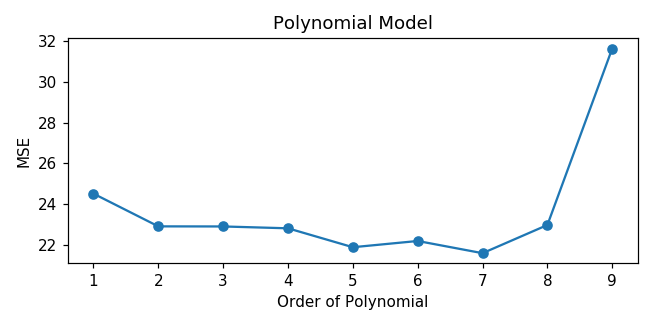

In [89]:
%matplotlib notebook

MSE = []
order_range = range(1, 10)
for order in order_range:
    MSE.append(model_MSE(x, y, order))
    
plt.figure(figsize=(6, 3))
plt.plot(order_range, MSE, marker = 'o')
plt.xlabel('Order of Polynomial')
plt.ylabel('MSE')
plt.title('Polynomial Model')
plt.tight_layout()
plt.savefig('Polynomial_model.png')
    

### Leave-One-Out Cross-Validation

In [ ]:
for order in range(1, 6):
    # Create a linear model
    model = LinearRegression()
    poly_reg = PolynomialFeatures(degree=order)  
    x_poly = poly_reg.fit_transform(x)
    model.fit(x_poly,y)
